<a href="https://colab.research.google.com/github/alireza-montazeri/SIT742-Assignment-2/blob/master/SIT742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student ID: s223415148<br>
Student name: Kunhee Han<br>
Workshop: friday 8am - 10am

# Part 1

## 1.1

1.1.1

In [5]:
from google.colab import files

# This will prompt you to select a file from your local filesystem
uploaded = files.upload()


Saving transactionrecord.csv to transactionrecord.csv


In [14]:
!pip install wget # Installing wget

# The 'wget' package is a Python implementation of the popular command-line download tool.
# It allows you to download files from the internet programmatically within your Python scripts.

!pip install pyspark # Installing PySpark

# The 'pyspark' package is the Python API for Apache Spark, a distributed computing framework.
# PySpark enables you to process large datasets efficiently across a cluster of computers,
# making it an essential tool for big data analytics and processing tasks in Python.


In [16]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import when

# Get the existing SparkContext
sc = SparkContext.getOrCreate()

# Initialize SQLContext
sqlContext = SQLContext(sc)

# Path to the uploaded file
file_path = "transactionrecord.csv"  # The file is in the current directory after upload

# Read the CSV file into a DataFrame
spark_df = sqlContext.read.csv(file_path, header=True, inferSchema=True)

# Show the rows where 'CustomerNo' is 'NA'
na_rows = spark_df.filter(spark_df.CustomerNo == 'NA')
na_rows.show()

# the result shows there's no rows that has 'NA' on CustomerNo column.

# Replace 'NA' with '-1' in the 'CustomerNo' column
spark_df = spark_df.withColumn('CustomerNo', when(spark_df.CustomerNo == 'NA', '-1').otherwise(spark_df.CustomerNo))

# Show the DataFrame after replacement
spark_df.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|
|       581475|12/9/2019|    23235|Storage Tin V

1.1.2

In [17]:
from pyspark.sql.functions import regexp_replace, col  # Importing the necessary functions


# Process the 'productName' column to remove non-alphabet characters
spark_df = spark_df.withColumn('productName_process', regexp_replace(col('productName'), '[^a-zA-Z]', ''))

# Show the first 5 rows
spark_df.select('productName', 'productName_process').show(5)

+--------------------+--------------------+
|         productName| productName_process|
+--------------------+--------------------+
|Set Of 2 Wooden M...|SetOfWoodenMarket...|
|Christmas Star Wi...|ChristmasStarWish...|
|Storage Tin Vinta...|StorageTinVintage...|
|Tree T-Light Hold...|TreeTLightHolderW...|
|Set Of 4 Knick Kn...|SetOfKnickKnackTi...|
+--------------------+--------------------+
only showing top 5 rows



## 1.2

1.2.1

In [18]:
from pyspark import SparkContext  # Correct import for SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col

# Calculate the revenue as price * Quantity and cast it to float
spark_df = spark_df.withColumn('revenue', (col('price') * col('Quantity')).cast('float'))

# Show the top 5 rows with the calculated revenue
spark_df.select('price', 'Quantity', 'revenue').show(5)

+-----+--------+-------+
|price|Quantity|revenue|
+-----+--------+-------+
|21.47|      12| 257.64|
|10.65|      36|  383.4|
|11.53|      12| 138.36|
|10.65|      12|  127.8|
|11.94|       6|  71.64|
+-----+--------+-------+
only showing top 5 rows



1.2.2

In [19]:
import pandas as pd

# Convert the PySpark DataFrame to a Pandas DataFrame
df = spark_df.toPandas()

# Convert the 'Date' column to a datetime format and create the 'transaction_date' column
df['transaction_date'] = pd.to_datetime(df['Date'])

# Show the top 5 rows of the Pandas DataFrame
print(df.head())

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

  Product_category  Price  Quantity CustomerNo         Country  \
0              0ca  21.47        12      17490  United Kingdom   
1              0ca  10.65        36      13069  United Kingdom   
2              0ca  11.53        12      13069  United Kingdom   
3              0ca  10.65        12      13069  United Kingdom   
4              0ca  11.94         6      13069  United Kingdom   

               productName_process     revenue transaction_date  
0          SetOfWoodenMarketCrates  257.640015       2019-12-09  
1  Chris

1.2.3

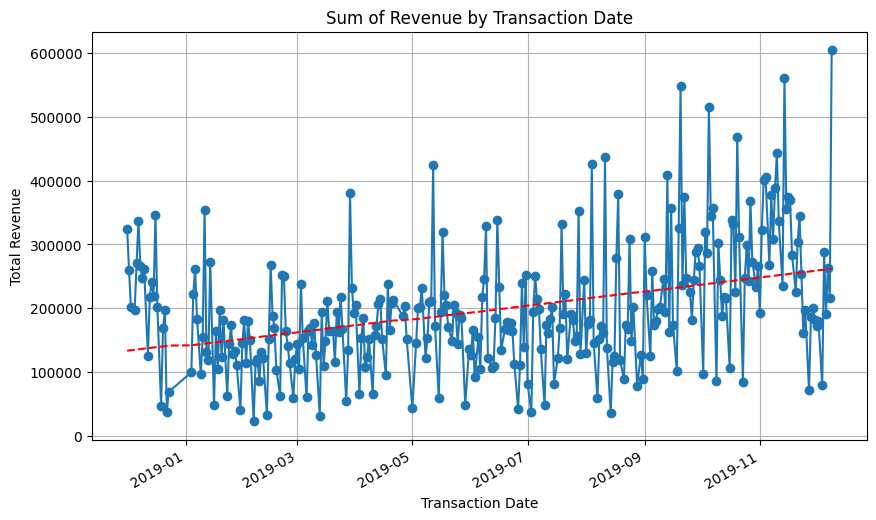

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Group by 'transaction_date' and calculate the sum of 'revenue'
revenue_by_date = df.groupby('transaction_date')['revenue'].sum()

# Plot the sum of revenue by date
plt.figure(figsize=(10, 6))
revenue_by_date.plot(kind='line', marker='o')

# Calculate the trend line (using NumPy's polyfit for a linear trend)
z = np.polyfit(range(len(revenue_by_date)), revenue_by_date.values, 1)
p = np.poly1d(z)

# Plot the trend line in red
plt.plot(revenue_by_date.index, p(range(len(revenue_by_date))), "r--", label='Trend Line')


# Add title and labels
plt.title('Sum of Revenue by Transaction Date')
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.grid(True)

# Display the plot
plt.show()

The revenue data shows considerable fluctuations with multiple outliers, indicating instability over time. However, the upward trend is evident, as depicted by the red trend line, suggesting that despite the volatility, revenue is generally increasing.

## 1.3

1.3.1

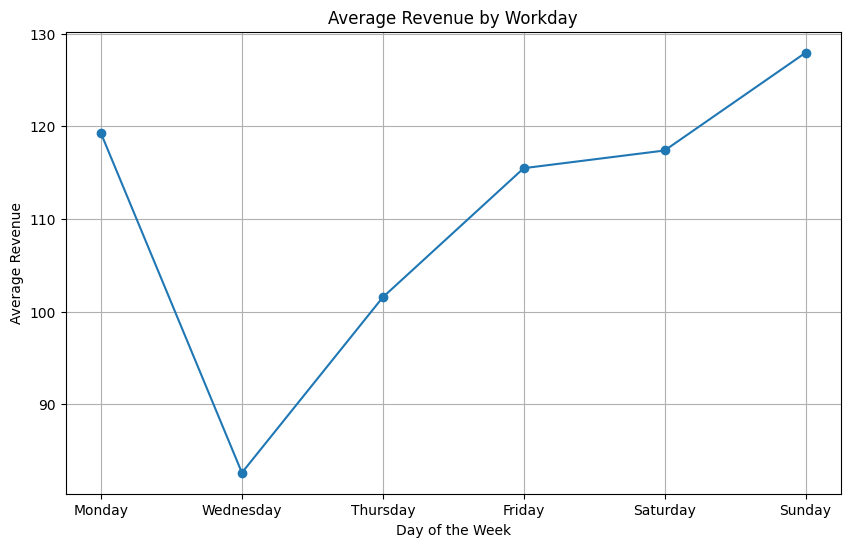

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a 'workday' column based on 'transaction_date'
df['workday'] = df['transaction_date'].dt.dayofweek  # Monday=0, Sunday=6

# Group by 'workday' and calculate the average revenue
average_revenue_by_workday = df.groupby('workday')['revenue'].mean()

# Map the workday numbers to their corresponding names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_revenue_by_workday.index = [day_names[day] for day in average_revenue_by_workday.index]

# Plot the results
plt.figure(figsize=(10, 6))
average_revenue_by_workday.plot(kind='line', marker='o')

# Add title and labels
plt.title('Average Revenue by Workday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.grid(True)

# Show the plot
plt.show()

It shows the highest average revenue on sunday.

1.3.2

In [22]:
# Sunday corresponds to 6 in the day of the week
workday_num = 6
filtered_df = df[df['workday'] == workday_num] #Filter data for sunday

# Identify the Product with the Highest Revenue on That Workday
highest_revenue_product = filtered_df.groupby('productName_process')['revenue'].sum().idxmax()
highest_revenue_value = filtered_df.groupby('productName_process')['revenue'].sum().max()
print(f"The product with the highest revenue on Sunday is: {highest_revenue_product} with a revenue of {highest_revenue_value}")

#Identify the Product with the Highest Sales Volume (Sum of Quantity) on That Workday
highest_sales_volume_product = filtered_df.groupby('productName_process')['Quantity'].sum().idxmax()
highest_sales_volume_value = filtered_df.groupby('productName_process')['Quantity'].sum().max()
print(f"The product with the highest sales volume on Sunday is: {highest_sales_volume_product} with a sales volume of {highest_sales_volume_value}")


The product with the highest revenue on Sunday is: WorldWarGlidersAsstdDesigns with a revenue of 187081.34375
The product with the highest sales volume on Sunday is: WorldWarGlidersAsstdDesigns with a sales volume of 18051


1.3.3

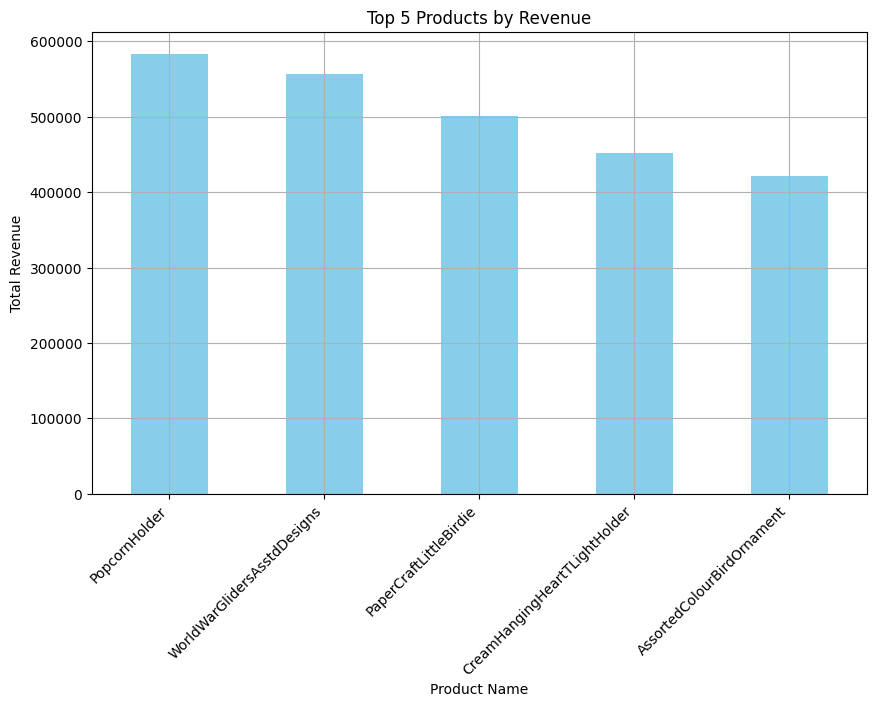

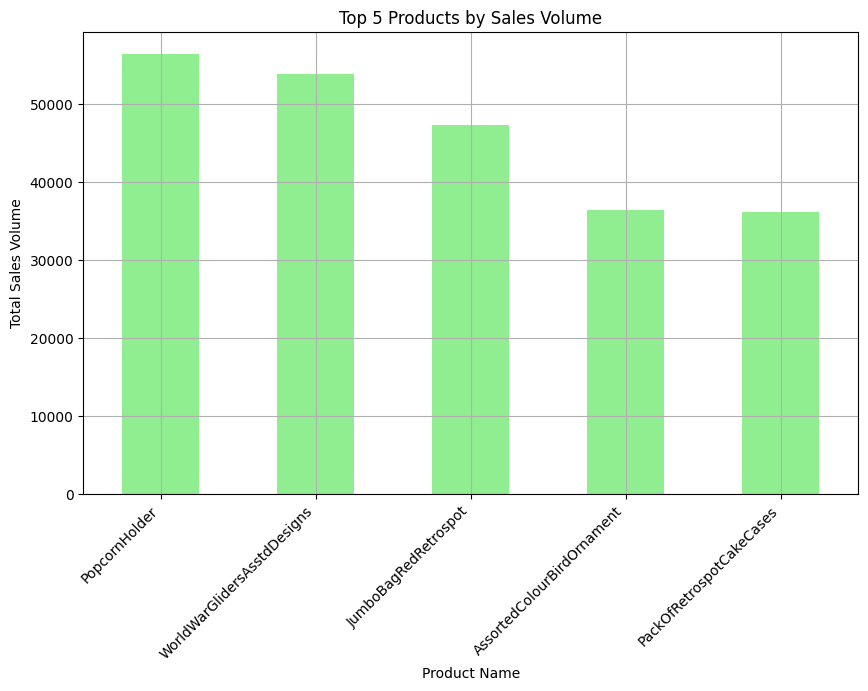

In [25]:
# Group by productName_process and calculate total revenue and total sales volume
product_revenue = df.groupby('productName_process')['revenue'].sum().sort_values(ascending=False).head(5)
product_sales_volume = df.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False).head(5)

# Plot the Top 5 Products by Revenue
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Plot the Top 5 Products by Sales Volume
plt.figure(figsize=(10, 6))
product_sales_volume.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

## 1.4

In [29]:
# Group by 'Country' and calculate total revenue
country_revenue = df.groupby('Country')['revenue'].sum().sort_values(ascending=False)

# Identify the country with the highest revenue
top_country = country_revenue.idxmax()
top_country_revenue = country_revenue.max()
print(f"The country with the highest revenue is: {top_country} with a total revenue of {top_country_revenue}")

# Extract the month from the 'transaction_date' column using .loc
top_country_df.loc[:, 'month'] = top_country_df['transaction_date'].dt.month

# Group by 'month' and calculate total revenue
monthly_revenue = top_country_df.groupby('month')['revenue'].sum().sort_values(ascending=False)

# Identify the month with the highest revenue
top_month = monthly_revenue.idxmax()
top_month_revenue = monthly_revenue.max()
print(f"The month with the highest revenue in {top_country} is: {top_month} with a total revenue of {top_month_revenue}")

The country with the highest revenue is: United Kingdom with a total revenue of 49994032.0
The month with the highest revenue in United Kingdom is: 11 with a total revenue of 6737640.0


## 1.5

In [34]:
# Filter out non-shopping transactions (quantity <= 0)
shopping_df = df[df['Quantity'] > 0]

# Calculate shopping frequency by counting distinct transactionNo for each customer
customer_frequency = shopping_df.groupby('CustomerNo')['TransactionNo'].nunique().sort_values(ascending=False)

# Identify the customer with the highest shopping frequency
most_frequent_customer = customer_frequency.idxmax()
most_frequent_customer_count = customer_frequency.max()
print(f"The customer who shops most frequently is: {most_frequent_customer} with {most_frequent_customer_count} distinct transactions")

# Analyze products purchased by this customer
customer_products = shopping_df[shopping_df['CustomerNo'] == most_frequent_customer]

# Summing the Quantity of products purchased by this customer
product_purchases = customer_products.groupby('productName_process')['Quantity'].sum().sort_values(ascending=False)

print(f"The products typically bought by customer {most_frequent_customer} are:\n")
print(product_purchases)



The customer who shops most frequently is: 12748 with 207 distinct transactions
The products typically bought by customer 12748 are:

productName_process
VictorianMetalPostcardSpring     595
WorldWarGlidersAsstdDesigns      480
RoseScentCandleJewelledDrawer    408
CartoonPencilSharpeners          405
SmallWhiteRetrospotMugInBox      390
                                ... 
PantryAppleCorer                   1
FrenchCarriageLantern              1
FrenchChateauLargePlatter          1
PairOfPinkFlowerClusterSlide       1
dVintageChristmasStickers          1
Name: Quantity, Length: 1750, dtype: int32


## 1.6

1.6.1

In [42]:
# Filter out non-shopping transactions (quantity <= 0)
shopping_df = df[df['Quantity'] > 0]

# Group by transactionNo and aggregate product_category and productName_process into lists
basket_analysis = shopping_df.groupby('TransactionNo').agg({
    'Product_category': lambda x: list(x),
    'productName_process': lambda x: list(x)
}).reset_index()

# Show the resulting DataFrame
print(basket_analysis.head())

  TransactionNo                                   Product_category  \
0        536365                [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]   
1        536366                                         [0ca, 0ca]   
2        536367  [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...   
3        536368                               [0ca, 0ca, 0ca, 0ca]   
4        536369                                              [0ca]   

                                 productName_process  
0  [CreamHangingHeartTLightHolder, WhiteMoroccanM...  
1      [HandWarmerUnionJack, HandWarmerRedRetrospot]  
2  [AssortedColourBirdOrnament, PoppysPlayhouseBe...  
3  [JamMakingSetWithJars, RedCoatRackParisFashion...  
4                            [BathBuildingBlockWord]  


1.6.2

In [47]:
# Define a function to remove adjacent duplicates
def remove_adjacent_duplicates(lst):
    return [v for i, v in enumerate(lst) if i == 0 or v != lst[i - 1]]

# Apply the function to the product_category lists
basket_analysis['Product_category'] = basket_analysis['Product_category'].apply(remove_adjacent_duplicates)

# Save the processed DataFrame as 'df_1' and print the top 10 rows
df_1 = basket_analysis
print(df_1.head(10))

  TransactionNo Product_category  \
0        536365            [0ca]   
1        536366            [0ca]   
2        536367            [0ca]   
3        536368            [0ca]   
4        536369            [0ca]   
5        536370            [0ca]   
6        536371            [0ca]   
7        536372            [0ca]   
8        536373            [0ca]   
9        536374            [0ca]   

                                 productName_process  
0  [CreamHangingHeartTLightHolder, WhiteMoroccanM...  
1      [HandWarmerUnionJack, HandWarmerRedRetrospot]  
2  [AssortedColourBirdOrnament, PoppysPlayhouseBe...  
3  [JamMakingSetWithJars, RedCoatRackParisFashion...  
4                            [BathBuildingBlockWord]  
5  [AlarmClockBakelikePink, AlarmClockBakelikeRed...  
6                          [PaperChainKitSChristmas]  
7      [HandWarmerRedRetrospot, HandWarmerUnionJack]  
8  [CreamHangingHeartTLightHolder, WhiteMoroccanM...  
9                          [VictorianSewingBoxLarge] 

## 1.7

1.7.1

In [51]:
# Create a new column 'prod_len' to store the length of the lists in 'product_category'
df_1['prod_len'] = df_1['Product_category'].apply(len)

# Print the first five rows of the dataframe 'df_1'
print(df_1.head(5))

  TransactionNo Product_category  \
0        536365            [0ca]   
1        536366            [0ca]   
2        536367            [0ca]   
3        536368            [0ca]   
4        536369            [0ca]   

                                 productName_process  prod_len  
0  [CreamHangingHeartTLightHolder, WhiteMoroccanM...         1  
1      [HandWarmerUnionJack, HandWarmerRedRetrospot]         1  
2  [AssortedColourBirdOrnament, PoppysPlayhouseBe...         1  
3  [JamMakingSetWithJars, RedCoatRackParisFashion...         1  
4                            [BathBuildingBlockWord]         1  


In [58]:
def data_processing(df_1, maxlength=3, minlength=1):
    # Step 1: Create the 'path' column by transforming the 'product_category' list into a string
    df_1['path'] = df_1['Product_category'].apply(lambda x: 'start > ' + ' > '.join(x) + ' > conversion')

    # Step 2: Clean up any potential formatting issues using str.replace()
    df_1['path'] = df_1['path'].str.replace('  ', ' ')  # This ensures no double spaces
    df_1['path'] = df_1['path'].str.replace('> >', '>')  # This removes any unintended '>>' occurrences

    # Step 3: Filter the DataFrame based on 'prod_len'
    df_1_filtered = df_1[(df_1['prod_len'] <= maxlength) & (df_1['prod_len'] >= minlength)]

    # Step 4: Return the new DataFrame without the list in 'path'
    return df_1_filtered

# Use df_1, apply the function with maxlength = 5 and minlength = 2
df_2 = data_processing(df_1, maxlength=5, minlength=2)

# Print the top 10 rows of the resulting dataframe 'df_2'
print(df_2.head(10))

   TransactionNo           Product_category  \
13        536378            [0ca, 1ca, 0ca]   
27        536395            [0ca, 1ca, 0ca]   
36        536404  [0ca, 1ca, 0ca, 4ca, 0ca]   
40        536408            [0ca, 1ca, 0ca]   
42        536412            [0ca, 4ca, 0ca]   
43        536415            [0ca, 1ca, 0ca]   
52        536464            [0ca, 1ca, 0ca]   
72        536532            [0ca, 1ca, 0ca]   
82        536542                 [0ca, 4ca]   
83        536544  [0ca, 1ca, 0ca, 4ca, 0ca]   

                                  productName_process  prod_len  \
13  [StrawberryCharlotteBag, ChildrensCutleryRetro...         3   
27  [BlackHeartCardHolder, AssortedColourBirdOrnam...         3   
36  [HeartIvoryTrellisSmall, ClearDrawerKnobAcryli...         5   
40  [MagicDrawingSlateDinosaur, MagicDrawingSlateB...         3   
42  [RoundSnackBoxesSetOfWoodland, RoundSnackBoxes...         3   
43  [CakeCasesVintageChristmas, PaperChainKitVinta...         3   
52  [BlackSwe